In [1]:
import pandas as pd

In [5]:
train = pd.read_csv(r'C:\Users\AjiteshShukla\OneDrive - Janes\Documents\mera_git\datasets\titanic\train.csv')
test = pd.read_csv(r'C:\Users\AjiteshShukla\OneDrive - Janes\Documents\mera_git\datasets\titanic\test.csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender_submission = pd.read_csv(r'C:\Users\AjiteshShukla\OneDrive - Janes\Documents\mera_git\datasets\titanic\gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Preprocessing

In [8]:
train_X = train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [9]:
train_X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# ONEHOT ENCODING
one_hot_encoded_data = pd.get_dummies(train_X, columns = ['Sex', 'Embarked'], dtype=int)
print(one_hot_encoded_data)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.0      1      0   7.2500           0         1   
1           1       1  38.0      1      0  71.2833           1         0   
2           1       3  26.0      0      0   7.9250           1         0   
3           1       1  35.0      1      0  53.1000           1         0   
4           0       3  35.0      0      0   8.0500           0         1   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0       2  27.0      0      0  13.0000           0         1   
887         1       1  19.0      0      0  30.0000           1         0   
888         0       3   NaN      1      2  23.4500           1         0   
889         1       1  26.0      0      0  30.0000           0         1   
890         0       3  32.0      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1  

In [11]:
one_hot_encoded_data = one_hot_encoded_data.drop(['Sex_female','Embarked_C'],axis=1)

In [12]:
one_hot_encoded_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [13]:
X_train = one_hot_encoded_data.drop(['Survived'],axis=1)
y_train = one_hot_encoded_data[['Survived']]

In [14]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [15]:
test = test.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [16]:
# ONEHOT ENCODING
one_hot_encoded_data = pd.get_dummies(test, columns = ['Sex', 'Embarked'], dtype=int)
print(one_hot_encoded_data)

     Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0         3  34.5      0      0    7.8292           0         1           0   
1         3  47.0      1      0    7.0000           1         0           0   
2         2  62.0      0      0    9.6875           0         1           0   
3         3  27.0      0      0    8.6625           0         1           0   
4         3  22.0      1      1   12.2875           1         0           0   
..      ...   ...    ...    ...       ...         ...       ...         ...   
413       3   NaN      0      0    8.0500           0         1           0   
414       1  39.0      0      0  108.9000           1         0           1   
415       3  38.5      0      0    7.2500           0         1           0   
416       3   NaN      0      0    8.0500           0         1           0   
417       3   NaN      1      1   22.3583           0         1           1   

     Embarked_Q  Embarked_S  
0             1      

In [17]:
one_hot_encoded_data = one_hot_encoded_data.drop(['Sex_female','Embarked_C'],axis=1)

In [18]:
X_test = one_hot_encoded_data

In [20]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


<Axes: >

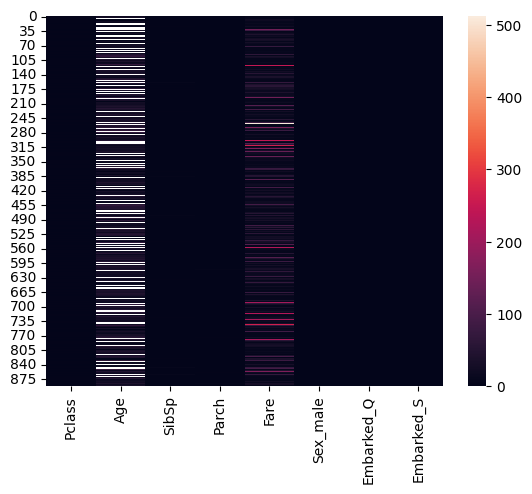

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.heatmap(data = X_train)


<Axes: >

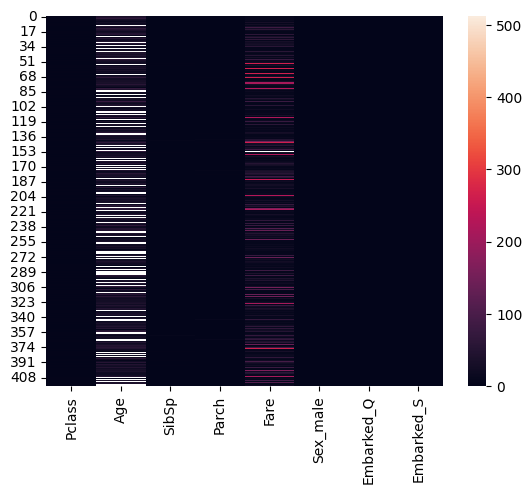

In [22]:
sns.heatmap(data = X_test)


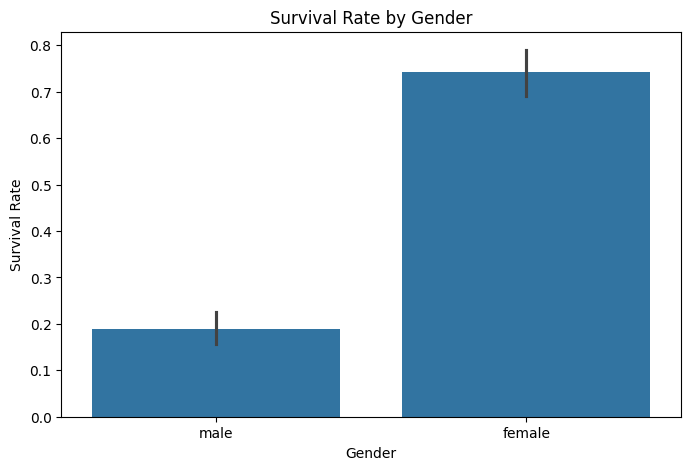

In [24]:
# Survival by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

In [25]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [26]:
#Resolving NAN values in Age
X_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [27]:
avg_age = X_train['Age'].mean()

In [28]:
X_train['Age'] = X_train['Age'].fillna(avg_age)

In [29]:
#Similarly for test set
avg_age = X_test['Age'].mean()
X_test['Age'] = X_test['Age'].fillna(avg_age)


In [30]:
avf_fare = X_test['Fare'].mean()
X_test['Fare'] = X_test['Fare'].fillna(avf_fare)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

c:\Users\AjiteshShukla\sourcing\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AjiteshShukla\sourcing\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
y_pred = clf.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [36]:
X = X_train
y = y_train

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
clf = LogisticRegression(random_state=0).fit(X_train1, y_train1)

c:\Users\AjiteshShukla\sourcing\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AjiteshShukla\sourcing\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
y_pred1 = clf.predict(X_test)

In [41]:
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
acc_log = round(clf.score(X_test1, y_test1) * 100, 2)
acc_log

81.69

In [44]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Sex_male,0.002830
1,SibSp,-0.028254
3,Fare,-0.087438
6,Embarked_S,-0.139390
2,Parch,-0.255728
0,Age,-0.865337
5,Embarked_Q,-2.412274
